# Visualize the hashtag data

In [1]:
import re
word_frequency_list = []

file_path = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/ordered_hastags.txt"

with open(file_path, "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            word = parts[0]
            frequency = int(parts[1])
            word_frequency_list.append([word, frequency])

print(word_frequency_list[0:100])

[['#Ukraine', 5022], ['#Russia', 2240], ['#Putin', 1743], ['#StandWithUkraine', 1205], ['#NATO', 760], ['#UkraineRussiaWar', 587], ['#ukraine', 514], ['#UkraineRussianWar', 490], ['#Russian', 464], ['#SlavaUkraini', 419], ['#UkraineWar', 392], ['#Kyiv', 361], ['#China', 356], ['#EU', 345], ['#RussiaUkraineWar', 322], ['#USA', 306], ['#war', 304], ['#RussianUkrainianWar', 297], ['#US', 297], ['#putin', 268], ['#Mariupol', 249], ['#Ukrainian', 249], ['#UkraineUnderAttack', 222], ['#Zelensky', 214], ['#Biden', 210], ['#StopRussia', 204], ['#StopPutinNOW', 189], ['#Europe', 185], ['#russia', 182], ['#Syria', 180], ['#Trump', 176], ['#BREAKING', 170], ['#RussiaUkraine', 170], ['#UKRAINE', 168], ['#Belarus', 167], ['#Kharkiv', 165], ['#StopPutin', 159], ['#ukrainewar', 156], ['#Poland', 153], ['#India', 152], ['#Zelenskyy', 151], ['#Kiev', 144], ['#Russians', 141], ['#Iran', 139], ['#msnbc', 139], ['#InternationalWomensDay', 136], ['#Ukrainians', 134], ['#War', 134], ['#UK', 130], ['#Moscow'

# Plot the most common hastags in a histogram

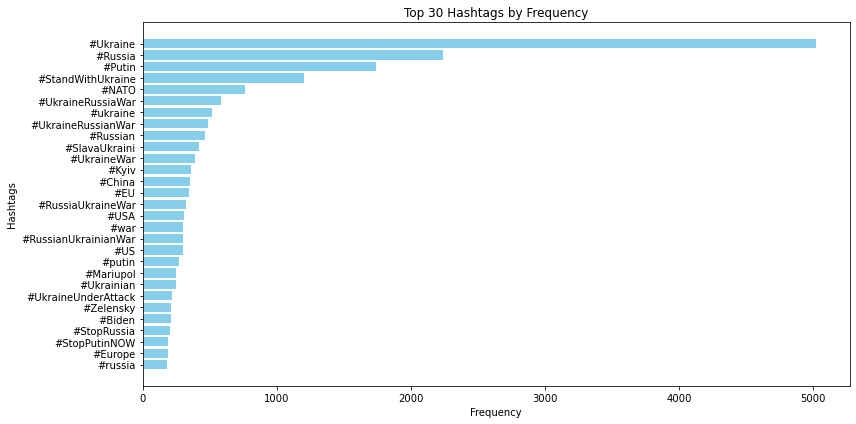

In [2]:
import matplotlib.pyplot as plt

num_words_to_take = 30
top_X_words_and_freq = word_frequency_list[0:num_words_to_take-1]
top_X_words, top_X_freq = zip(*top_X_words_and_freq)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(top_X_words, top_X_freq, color='skyblue')
plt.gca().invert_yaxis()  # Reverse the order to have the most common word at the top
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title(f'Top {num_words_to_take} Hashtags by Frequency')
plt.tight_layout()
plt.show()


## Remove the hastags for sentiment analysis part

In [3]:
hashless_word_frequency_list = [[word[1:], freq] for word, freq in word_frequency_list]
print(hashless_word_frequency_list[0:20])

[['Ukraine', 5022], ['Russia', 2240], ['Putin', 1743], ['StandWithUkraine', 1205], ['NATO', 760], ['UkraineRussiaWar', 587], ['ukraine', 514], ['UkraineRussianWar', 490], ['Russian', 464], ['SlavaUkraini', 419], ['UkraineWar', 392], ['Kyiv', 361], ['China', 356], ['EU', 345], ['RussiaUkraineWar', 322], ['USA', 306], ['war', 304], ['RussianUkrainianWar', 297], ['US', 297], ['putin', 268]]


## Get average weighted sentiment of most common hastags

In [4]:
from textblob import TextBlob

# take the most common 100 words and get their total sentiment
num_words_to_take = len(hashless_word_frequency_list)
top_X_words_and_freq = hashless_word_frequency_list[0:num_words_to_take-1]

# get the weighted average sentiment
total_unweighted_sentiment = 0
total_weighted_sentiment = 0
total_occurances_of_words = 0
for word, freq in top_X_words_and_freq:
    if freq > 1:
        blob = TextBlob(word)
        word_sentiment = blob.sentiment.polarity
        total_unweighted_sentiment += word_sentiment
        total_weighted_sentiment += word_sentiment*freq
        total_occurances_of_words += freq
        print(f"freq = {freq}, word = {word}, sentiment = {word_sentiment}")

/Users/hannojacobs/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


freq = 5022, word = Ukraine, sentiment = 0.0
freq = 2240, word = Russia, sentiment = 0.0
freq = 1743, word = Putin, sentiment = 0.0
freq = 1205, word = StandWithUkraine, sentiment = 0.0
freq = 760, word = NATO, sentiment = 0.0
freq = 587, word = UkraineRussiaWar, sentiment = 0.0
freq = 514, word = ukraine, sentiment = 0.0
freq = 490, word = UkraineRussianWar, sentiment = 0.0
freq = 464, word = Russian, sentiment = 0.0
freq = 419, word = SlavaUkraini, sentiment = 0.0
freq = 392, word = UkraineWar, sentiment = 0.0
freq = 361, word = Kyiv, sentiment = 0.0
freq = 356, word = China, sentiment = 0.0
freq = 345, word = EU, sentiment = 0.0
freq = 322, word = RussiaUkraineWar, sentiment = 0.0
freq = 306, word = USA, sentiment = 0.0
freq = 304, word = war, sentiment = 0.0
freq = 297, word = RussianUkrainianWar, sentiment = 0.0
freq = 297, word = US, sentiment = 0.0
freq = 268, word = putin, sentiment = 0.0
freq = 249, word = Mariupol, sentiment = 0.0
freq = 249, word = Ukrainian, sentiment = 0.0

## Show the average sentiments

In [5]:
avg_weighted_sentiment = total_weighted_sentiment/total_occurances_of_words
avg_unweighted_sentiment = total_unweighted_sentiment/num_words_to_take
print(f"avg_weighted_sentiment = {avg_weighted_sentiment}")
print(f"avg_unweighted_sentiment = {avg_unweighted_sentiment}")

avg_weighted_sentiment = -0.0007536875091249729
avg_unweighted_sentiment = -9.708716768450227e-05


Here the average sentiments are both slightly negative which is what we would expect in war time.

However, if we take a look at the printed sentiments for each of the words above most have no sentiment related to them and are neutral.

# BEWARE: Don't go on if you are sensitive to bad language
Lets look for the bad words in hastags to find out what the sentiment is

In [6]:
# Words to search for (in lowercase)
bad_words = ['fuck', 'shit', 'dick', 
                'asshole', 'dick', 'bitch', 
                'bastard', 'damn', 'cunt',
                'criminal', 'warcrime'
                ]

side_1 = ["Ukraine", "Volodymyr", "Zelensky"]
side_2 = ["Russia", "Vladimir", "Putin", "Vlad"]

# Initialize a dictionary to store the results
search_results = {search_word: 0 for search_word in bad_words}

side_1_tags = []
side_2_tags = []
side_1_counter = 0
side_2_counter = 0

print("The bad hastags are:\n")
badhashtags = []
# Loop through each word in the list
for word_freq_pair in hashless_word_frequency_list:
    original_word = word_freq_pair[0]
    word = word_freq_pair[0].lower()  # Convert the word to lowercase
    
    # Loop through each search word
    for search_word in bad_words:
        # Check if the lowercase search word is a substring of the lowercase current word
        if search_word in word:
            # Increment the count for that search word
            search_results[search_word] += 1
            badhashtags.append(original_word)
            print(f"{original_word}")

            for search_word_2 in side_1:
                # Check if the bad word is associated with side_1
                search_word_2 = search_word_2.lower()
                if search_word_2 in word:
                    side_1_tags.append(original_word)
                    side_1_counter += 1

            for search_word_2 in side_2:
                # Check if the bad word is associated with side_2
                search_word_2 = search_word_2.lower()
                if search_word_2 in word:
                    side_2_tags.append(original_word)
                    side_2_counter += 1


# Print the results
occurance_count = []
for search_word, count in search_results.items():
    text = f'Occurrences of "{search_word}": {count}'
    occurance_count.append(text)
    print(text)

file_path = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/bad_hastags.txt"

with open(file_path, "w") as file:
    file.write("###### Occurances of bad words in hastags ########\n\n")
    for text in occurance_count:
        file.write(f"{text}\n")

    file.write("\n###### Occurances of side_1 bad hastags ########\n")
    file.write(f"Total hastags against side_1 = {side_1_counter}\n\n")
    for text in side_1_tags:
        file.write(f"{text}\n")

    file.write("\n###### Occurances of side_2 bad hastags ########\n")
    file.write(f"Total hastags against side_2 = {side_2_counter}\n\n")
    for text in side_2_tags:
        file.write(f"{text}\n")

    file.write("\n\n########### List of bad hastags ###########\n")
    file.write("########### List of bad hastags ###########\n")
    file.write("########### List of bad hastags ###########\n\n")

    for tag in badhashtags:
        file.write(f"{tag}\n")

print(f"Bad hastags have been written to {file_path}")

The bad hastags are:

PutinWarCriminal
PutinIsaWarCriminal
WarCrimes
PutinWarCrimes
PutinsWarCrimes
WarCriminal
warcrimes
WarCrime
WarCriminalPutin
WarCriminals
FuckPutin
RussianWarCrimes
warcriminal
criminal
warcrime
PutinIsAWarCriminal
fuckputin
Criminal
StopPutinWarCrimesNow
Criminals
InternationalCriminalCourt
RussiaWarCrimes
Warcrime
Warcrimes
criminals
PutinisaWarCriminal
WARCRIMES
bastards
FuckNWO
FuckRussia
WARCRIME
ZelenskyWarCriminal
gofuckyourself
shit
warCrimes
warcriminals
BULLSHIT
Bastard
CRIMINAL
CRIMINALS
FUCKRUSSIA
Fuck
FuckTheEU
FuckYouPutin
FuckuPutin
IranCriminals
OrangeShitstain
PutinsBitch
Putinwarcrimes
RussianWarCriminals
ToryCriminalsUnfitToGovern
WarCrimesTracker
WarCrimesofRussia
dickhead
dickhead
fucked
fuckrussia
natocriminal
putinWarCriminal
putinwarcriminal
shitshow
warcrimesofputin
AssadWarCriminal
BITCHES
Bastards
BidenIsAWarCriminal
BidenWarCriminal
BitChute
Bitch
Bullshit
CriminalCourt
CriminalPutin
CriminalRegimes
CriminalWar
CriminalpUTIN
Dick
Dick


## Analyse the results

In [7]:
print(f"The number of hastags going against Ukraine = {side_1_counter}")
print(f"The number of hastags going against Russia = {side_2_counter}")

The number of hastags going against Ukraine = 44
The number of hastags going against Russia = 521


## Save only the bad hastags of each in a seperate file

In [8]:
side_1_unreduced_path = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/unreduced_side_1_bad_hastags.txt"
side_2_unreduced_path = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/unreduced_side_2_bad_hastags.txt"

# Make them all lowercase and then 
with open(side_1_unreduced_path, "w") as file:
    for text in side_1_tags:
        file.write(f"{text.lower()}\n")

with open(side_2_unreduced_path, "w") as file:
    for text in side_2_tags:
        file.write(f"{text.lower()}\n")

## Now mapreduce both the files and work with them further in their reduced form
### Arrange the mapreduced words in descending order in lists

In [9]:
side_1_reduced = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/reduced_side_1_bad_hastags.txt"
side_2_reduced = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/reduced_side_2_bad_hastags.txt"

file_path = side_1_reduced
side_1_freqs = []
with open(file_path, 'r') as file:
    for line in file:
        parts = re.split(r'\s+', line.strip())
        
        if len(parts) >= 2:
            word = parts[0]
            frequency = int(parts[-1])
            side_1_freqs.append([word, frequency])

side_1_freqs = sorted(side_1_freqs, key=lambda x: x[1], reverse=True)
print(f"side_1_freqs =\n{side_1_freqs}")

file_path = side_2_reduced
side_2_freqs = []
with open(file_path, 'r') as file:
    for line in file:
        parts = re.split(r'\s+', line.strip())
        
        if len(parts) >= 2:
            word = parts[0]
            frequency = int(parts[-1])
            side_2_freqs.append([word, frequency])

side_2_freqs = sorted(side_2_freqs, key=lambda x: x[1], reverse=True)
print(f"\nside_2_freqs =\n{side_2_freqs}")

side_1_freqs =
[['fuckukraine', 3], ['zelenskyisawarcriminal', 3], ['dicksoutforukraine', 2], ['russianwarcrimesinukraine', 2], ['ukrainewarcrime', 2], ['warcrimesinukraine', 2], ['zelenskywarcriminal', 2], ['zelenskyyisawarcriminal', 2], ['criminalukraine', 1], ['deepshitsinukraine', 1], ['dontfuckwithukraine', 1], ['fuckingukrainewar', 1], ['fuckputinswarwithukraine', 1], ['fuckzelensky', 1], ['getfuckedukraine', 1], ['getthefuckoutofukraine', 1], ['getthefuckoutofukraineputin', 1], ['grc_warcrimeswatch_ukraine', 1], ['natoclosethefuckingskyoverukraine', 1], ['russianwarcrimesinsyriaukraine', 1], ['russiaswarcrimeinukraine', 1], ['sparemeandukraineyournationalistbullshit', 1], ['stopthewarcrimesinukraine', 1], ['ukrainecriminal', 1], ['ukrainewarcrimes', 1], ['ukrainewarcriminals', 1], ['warcrimesagainstukraine', 1], ['warcrimesofukraine', 1], ['warcriminalzelensky', 1], ['waytofuckuprussiaukraine', 1], ['whatthefucksbombingukrainethen', 1], ['zelenskycriminal', 1], ['zelenskyfuckedu

## Now plot these in a histogram

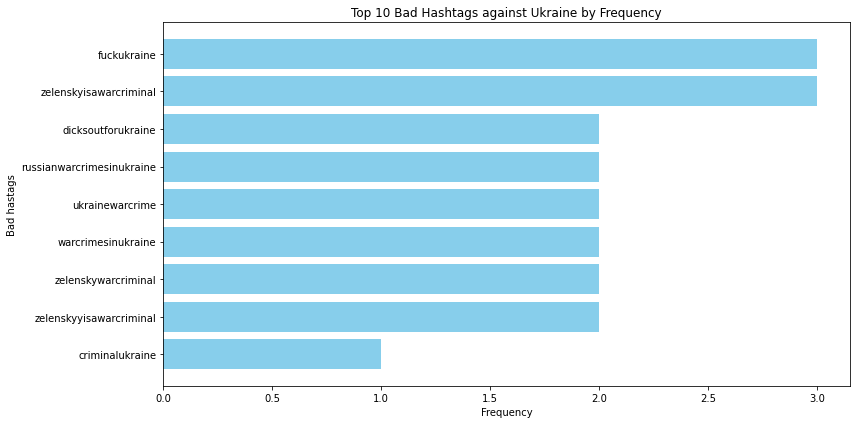

In [10]:
num_words_to_take = 10
top_X_words_and_freq = side_1_freqs[0:num_words_to_take-1]
top_X_words, top_X_freq = zip(*top_X_words_and_freq)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(top_X_words, top_X_freq, color='skyblue')
plt.gca().invert_yaxis()  # Reverse the order to have the most common word at the top
plt.xlabel('Frequency')
plt.ylabel('Bad hastags')
plt.title(f'Top {num_words_to_take} Bad Hashtags against Ukraine by Frequency')
plt.tight_layout()
plt.show()

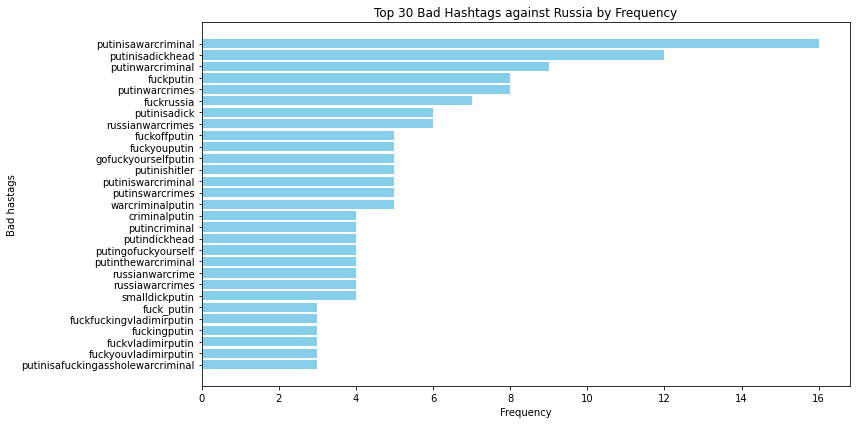

In [11]:
num_words_to_take = 30
top_X_words_and_freq = side_2_freqs[0:num_words_to_take-1]
top_X_words, top_X_freq = zip(*top_X_words_and_freq)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(top_X_words, top_X_freq, color='skyblue')
plt.gca().invert_yaxis()  # Reverse the order to have the most common word at the top
plt.xlabel('Frequency')
plt.ylabel('Bad hastags')
plt.title(f'Top {num_words_to_take} Bad Hashtags against Russia by Frequency')
plt.tight_layout()
plt.show()

## Conclusions
* Therefore there is a much more negative sentiment against Russia than against Ukraine when looking at english language tweet hastags.
* If you analyse the hastags manually it can be seen that some of the "negative" hastags going against Ukraine are actually not so, but include a Russia insult as well, or they are not even negative
* I would like to repeat this for Russian and Ukrainian but I don't know those languages.